[Home](../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

####  Step 2

Load the model for testing

In [2]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


(Optional) Load a second model if you want to do comparative testing

In [20]:
filename = 'my_saved_model_v1.sav'
model_B = pickle.load(open(filename, 'rb'))

####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [3]:
x_col = 'budget'
testing_data = pd.read_csv('testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['gross'])

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

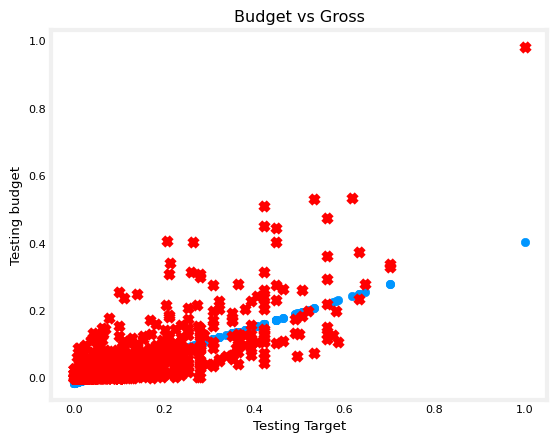

In [4]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("Budget vs Gross")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [5]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.5107130911650527


#### Step 7

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [6]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : y_test - model_A.predict(x_test).round(2)
})
print(table)
cost = table['Loss'].sum() / table.shape[0]
print(f"The cost or average loss of this model is {cost}")

         DoB       DoT  Predicted result      Loss
0   0.146154  0.095385          0.215465 -0.124615
1   0.534615  0.630769          0.455053  0.170769
2   0.538462  0.867692          0.457425  0.407692
3   0.669231  0.230769          0.538078 -0.309231
4   0.607692  0.732308          0.500124  0.232308
5   0.146154  0.200000          0.215465 -0.020000
6   0.211538  0.138462          0.255791 -0.121538
7   0.653846  0.344615          0.528590 -0.185385
8   0.657692  0.803077          0.530962  0.273077
9   0.753846  0.796923          0.590266  0.206923
10  0.576923  0.615385          0.481147  0.135385
11  0.615385  0.800000          0.504868  0.300000
12  0.288462  0.255385          0.303235 -0.044615
13  0.176923  0.375385          0.234442  0.145385
14  0.565385  0.504615          0.474030  0.034615
15  0.623077  0.646154          0.509612  0.136154
16  0.573077  0.452308          0.478774 -0.027692
17  0.307692  0.387692          0.315095  0.067692
18  0.580769  0.415385         

You may want to do some manual predictions to understand your model.

In [25]:
print(model_A.predict([[0.1]]))
print(model_A.predict([[1]]))

[-66.30802998]
[-58.81285279]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [26]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: -67.14082744272244
Coefficient: [8.32797465]


#### Step 9. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [3]:
filename = 'my_saved_model_v2.sav'
model_C = pickle.load(open(filename, 'rb'))

In [8]:
# Optional
filename = 'my_saved_model_v2.sav'
model_D = pickle.load(open(filename, 'rb'))

In [5]:
mx_col = ['budget','score','release_quarter', 'star_popularity', 'director_popularity', 'votes']
testing_data = pd.read_csv('testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['gross'])

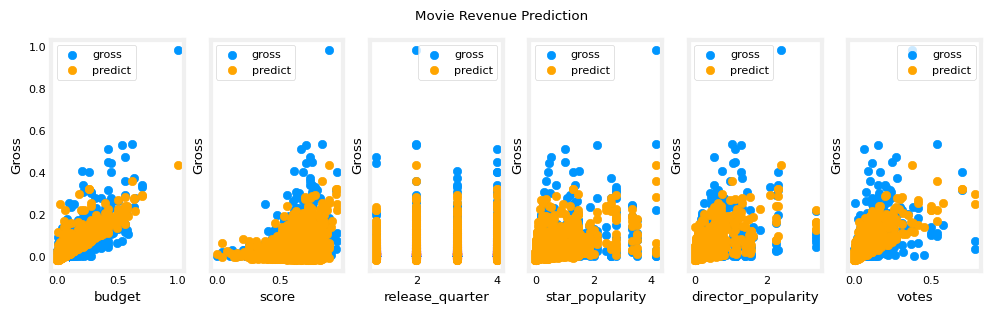

In [6]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'gross')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Gross"); ax[i].legend();
fig.suptitle("Movie Revenue Prediction")
plt.show()

In [7]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.6315557168314376


In [ ]:
#manual calculation of cost
print(model_C.predict([[0.1,0.1,0.1]]))
print(model_C.predict([[1,0.5,1]]))

ValueError: X has 3 features, but LinearRegression is expecting 6 features as input.

In [ ]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

     BMI        BP  FDR  Target  Predicted result    Cost
0   23.0  0.611765  0.0    50.0        130.901635  -80.90
1   29.5  0.580353  1.0   198.0        188.836182    9.16
2   25.4  0.447059  1.0   168.0        145.101914   22.90
3   23.2  0.654941  2.0   190.0        163.250587   26.75
4   21.1  0.294118  0.0   183.0         84.653684   98.35
5   30.4  0.352941  0.0   103.0        159.128938  -56.13
6   22.1  0.317647  1.0    69.0        107.654536  -38.65
7   30.3  0.635294  0.0   166.0        187.061520  -21.06
8   23.1  0.364706  2.0   125.0        133.044486   -8.04
9   25.9  0.447059  1.0   230.0        148.784845   81.22
10  27.8  0.352941  2.0   242.0        166.469485   75.53
11  20.5  0.270588  2.0    65.0        104.336857  -39.34
12  23.0  0.541176  2.0   135.0        150.226130  -15.23
13  20.3  0.227412  1.0    96.0         85.233798   10.77
14  25.7  0.564706  0.0   182.0        146.011266   35.99
15  25.2  0.258824  1.0   160.0        124.515963   35.48
16  33.0  0.47

In [ ]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: -100.62970595557368
Coefficient: [  7.3658613  101.53663706  13.24589332]


#### Step 10

When your model is ready for operations, move it to the [3.Operations\3.1.Deploy_Model](\3.Operations\3.1.Deploy_Model) folder.